In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("Placement.csv")

In [3]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [4]:
dataset.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [5]:
#Replace the NaN values with correct value. And justify why you have chosen the same

dataset["salary"].fillna(0,inplace=True)

C:\Users\Sathish\AppData\Local\Temp\ipykernel_16360\640199777.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["salary"].fillna(0,inplace=True)


In [6]:
dataset.isna().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [7]:
# Replacing "0" to Nan value because the salary depends on status of the placement who were placed and not placed.

In [8]:
#How many of them are not placed

(dataset["status"]=="Not Placed").value_counts()

status
False    148
True      67
Name: count, dtype: int64

In [9]:
# 67 students are Not placed

In [10]:
qual=[]
quan=[]
for columnName in dataset.columns:
    if(dataset[columnName].dtypes=='O'):
        qual.append(columnName)
    else:
        quan.append(columnName)

In [11]:
qual

['gender',
 'ssc_b',
 'hsc_b',
 'hsc_s',
 'degree_t',
 'workex',
 'specialisation',
 'status']

In [12]:
quan

['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

In [13]:
#Find the reason for non placement from the dataset

dataset.groupby('status')[quan].mean()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
status,,,,,,,
Not Placed,110.477612,57.544030,58.395522,61.134179,69.587910,61.612836,0.000000
Placed,106.878378,71.721486,69.926554,68.740541,73.238041,62.579392,288655.405405


In [14]:
# The Not Placed student average scores in ssc,hsc,degree,etest, mba is more than the Not placed students so it might be the reason

In [15]:
# 4)What kind of relation between salary and mba_p

dataset[quan].corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.002543
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.002543,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


In [16]:
# The relationship between salary and mba_p is low degree positive relationship (0.13<0.54).

In [17]:
#5)Which specialization is getting minimum salary?

dataset.groupby("specialisation")[["salary"]].min()

,salary
specialisation,
Mkt&Fin,0.0
Mkt&HR,0.0


In [18]:
# The mkt&Fin and Mkt&HR getting the minimum salary

In [19]:
#  6)How many of them getting above 500000 salary?

(dataset["salary"]>500000).sum()


np.int64(3)

In [20]:
# Three students are getting above 500000 salary. 

In [21]:
# 7)Test the Analysis of Variance between etest_p and mba_p at signifance level 5%.(Make decision using Hypothesis Testing

from scipy.stats import stats
stats.f_oneway(dataset["etest_p"],dataset["mba_p"])


C:\Users\Sathish\AppData\Local\Temp\ipykernel_16360\3534535954.py:4: DeprecationWarning: Please import `f_oneway` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  stats.f_oneway(dataset["etest_p"],dataset["mba_p"])


F_onewayResult(statistic=np.float64(98.64487057324709), pvalue=np.float64(4.672547689133636e-21))

In [22]:
#H0-There is no significant difference between two variables.
#H1-There is significant difference between two variables.
#pvalue is 0<0.05 so Reject null hypothesis and 
#H1-There is significant difference between two variables of etest_p and mba_p.

In [23]:
# 8)Test the similarity between the degree_t(Sci&Tech) and specialisation(Mkt&HR) with respect to salary at significance level of 5%.(Make decision using Hypothesis Testing)

import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('salary ~ C(degree_t)+ C(specialisation) + C(degree_t):C(specialisation)', data=dataset).fit()
anova_table = sm.stats.anova_lm(model, type=2)
print(anova_table)

                                  df        sum_sq       mean_sq          F  \
C(degree_t)                      2.0  8.032042e+10  4.016021e+10   1.803516   
C(specialisation)                1.0  3.815378e+11  3.815378e+11  17.134112   
C(degree_t):C(specialisation)    2.0  1.101264e+10  5.506318e+09   0.247278   
Residual                       209.0  4.653956e+12  2.226773e+10        NaN   

                                 PR(>F)  
C(degree_t)                    0.167273  
C(specialisation)              0.000051  
C(degree_t):C(specialisation)  0.781152  
Residual                            NaN  


Step 1:Hypothesis
For degree_t
H0-There is no significant difference between in salary based on degree.
H1-There is significant difference between in salary based on degree.
For Specilisation
H0-There is no significant difference between in salary based on specialisation.
H1-There is significant difference between in salary based on specialisation.
For degree and specialisation(interaction)
H0-There is no interaction effect between degree and specialisation on salary.
H1-Interaction effect.

degree_t pvalue is 0.16>0.05, So there is no significant.
specialisation pvalue is 0.0<0.05, so there is a significant

C:\Users\Sathish\AppData\Local\Temp\ipykernel_16360\1165027314.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(z_score,kde=True)


np.float64(-7.849018592698781e-17)

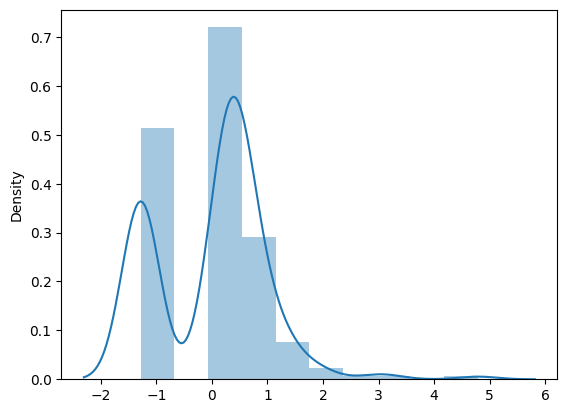

In [24]:
# 9)Convert the normal distribution to standard normal distribution for salary column
import numpy as np
import seaborn as sns
mean=dataset["salary"].mean()
std=dataset["salary"].std()
values=[i for i in dataset["salary"]]
z_score=[((j-mean)/std) for j in values]
sns.distplot(z_score,kde=True)
zscore=np.array(z_score)
zscore.mean()


C:\Users\Sathish\AppData\Local\Temp\ipykernel_16360\3625231297.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["salary"])


<Axes: xlabel='salary', ylabel='Density'>

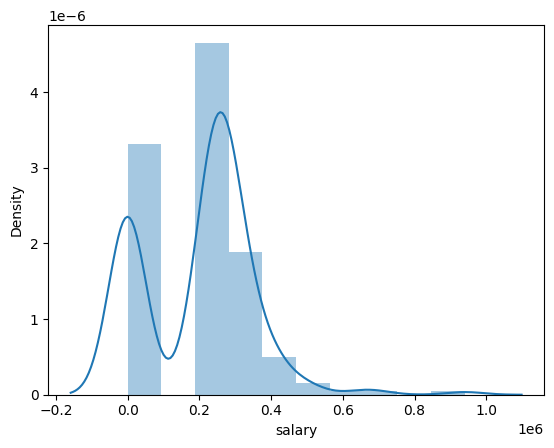

In [25]:
# 10)What is the probability Density Function of the salary range from 700000 to 900000?

sns.distplot(dataset["salary"])

In [26]:
def get_pdf_probabilities(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    ax=sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')   #kde is the kernel density if it True the curve will reflect
    pyplot.axvline(startrange,color='Red')   #axis vertical line of the start range
    pyplot.axvline(endrange,color='Red')
    sample=dataset
    sample_mean=sample.mean()
    sample_std=sample.std()
    print('mean={:.3f},standard Deviation={:.3f}'.format(sample_mean,sample_std))
    dist=norm(sample_mean,sample_std)
    values=[value for value in range(startrange,endrange)]
    probabilities=[dist.pdf(value) for value in values]
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob

C:\Users\Sathish\AppData\Local\Temp\ipykernel_16360\2195670004.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')   #kde is the kernel density if it True the curve will reflect


mean=198702.326,standard Deviation=154780.927
The area between range(700000,900000):0.0005973310593974868


np.float64(0.0005973310593974868)

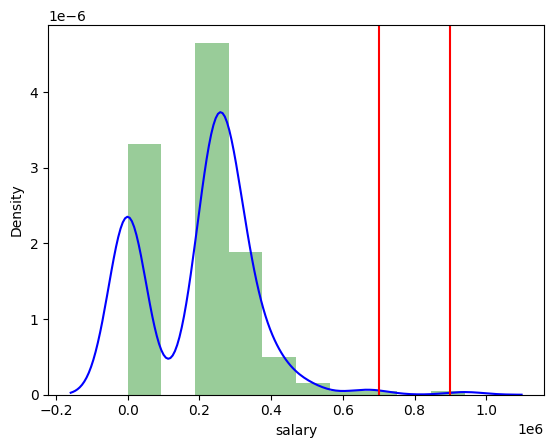

In [27]:
get_pdf_probabilities(dataset["salary"],700000,900000)

In [28]:
# 11)Test the similarity between the degree_t(Sci&Tech)with respect to etest_p and mba_p at significance level of 5%.(Make decision using Hypothesis Testing

from scipy.stats import ttest_rel
sci_tech=dataset[dataset['degree_t']=='Sci&Tech']['etest_p']
sci_tech1=dataset[dataset['degree_t']=='Sci&Tech']['mba_p']
ttest_rel(sci_tech,sci_tech1)

TtestResult(statistic=np.float64(5.0049844583693615), pvalue=np.float64(5.5179206005054e-06), df=np.int64(58))

In [29]:
#paired vriable-same group with deifferent condition
#pvalue is 0.0<0.05 so reject null hypothesis,H1-There is significant between the degree_t(Sci&Tech)with respect to etest_p and mba_p 

In [30]:
# 12)Which parameter is highly correlated with salary

dataset[quan].corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.002543
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.002543,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


In [31]:
# The highly correlated parameter is ssc_p (0.53)

C:\Users\Sathish\AppData\Local\Temp\ipykernel_16360\2195670004.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')   #kde is the kernel density if it True the curve will reflect


mean=198702.326,standard Deviation=154780.927
The area between range(700000,900000):0.0005973310593974868


np.float64(0.0005973310593974868)

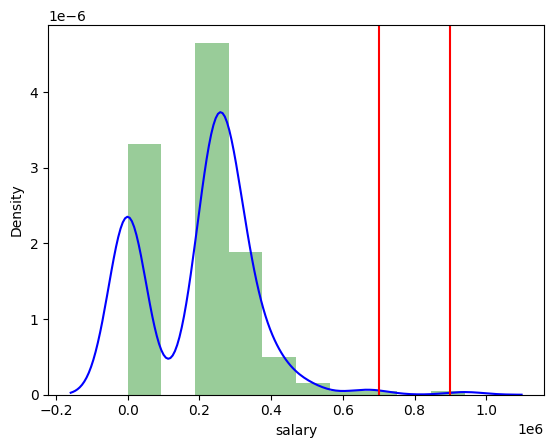

In [32]:
get_pdf_probabilities(dataset["salary"],700000,900000)

The probability density function is the probability distribution of continuous variable, It tells the porbability of particular range.
The above graph represents the probability of the salary between the range 700000 and 900000 which shows red colour.
The area between range(700000,900000):0.0005973310593974868 so the probability is very low. Only one student getting the salary between these range.